<a href="https://colab.research.google.com/github/amythemirror/Springboard-Capstone-Three/blob/main/Sentiment_Analysis_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Install Simple Transformers

In [ ]:
# install simpletransformers
!pip install simpletransformers
!pip install transformers -U

#Load Data

In [ ]:
import numpy as np
import pandas as pd
from ast import literal_eval

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/Springboard/Capstone Three/data_wrangling.csv', \
                usecols=['reviewClean_sw'], squeeze=True, \
                converters={'reviewClean_sw': literal_eval}).values
y = pd.read_csv('/content/drive/MyDrive/Springboard/Capstone Three/data_wrangling.csv', \
                usecols=['sentiment'], squeeze=True).values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

In [ ]:
def convert_list_to_string(org_list, seperator=' '):
    """ Convert list to string, by joining all item in list with given separator.
        Returns the concatenated string """
    return seperator.join(org_list)

X_train = [convert_list_to_string(tokens) for tokens in X_train]
X_test = [convert_list_to_string(tokens) for tokens in X_test]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# encode text sentiment labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

encoder.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [ ]:
train_df = pd.DataFrame({'text': X_train, 'labels': y_train})
train_df.head()

,text,labels
0,i be a size 18 and 2x fit great . they be thic...,2
1,like i say of the prayer scarf it be make of q...,2
2,i want to like this as i think it be beautiful...,1
3,"as the picture , very cute design",2
4,so cheap ! and handle return very easily so i ...,2


In [ ]:
test_df = pd.DataFrame({'text': X_test, 'labels': y_test})
test_df.head()

,text,labels
0,sadly it be apparent that my behind be too big...,1
1,"i have a sensory integration problem , mean th...",2
2,"fit well , all light light up , only flaw be i...",2
3,very comfortable . go on a 10 mile bike ride a...,2
4,"firstly , i be quite satisfied that it come ea...",2


In [ ]:
print('train shape: ',train_df.shape)
print('test shape: ',test_df.shape)

train shape:  (682071, 2)
test shape:  (170518, 2)


#Model Training

## Training for 2 epochs



In [ ]:
model_args = {
   'output_dir': '/content/drive/MyDrive/Springboard/Capstone Three/transformer/bert_uncased/outputs/',
   'cache_dir': '/content/drive/MyDrive/Springboard/Capstone Three/transformer/bert_uncased/cache_dir/',
   'use_multiprocessing': False,
   'fp16': False,
   'num_train_epochs': 2,
   'save_steps': -1, # prevent the model from saving intermediary checkpoints
}

from simpletransformers.classification import ClassificationModel

model = ClassificationModel(
    'bert',
    'bert-base-uncased',
    num_labels=3,
    args=model_args
) 

model.train_model(train_df)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

  0%|          | 0/682070 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/85259 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running Epoch 1 of 2:   0%|          | 0/85259 [00:00<?, ?it/s]

(170518, 0.3820912318238956)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score

def f1_multiclass(labels, preds):
  return f1_score(labels, preds, average=None)

result, model_outputs, wrong_preds = model.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score, bacc=balanced_accuracy_score)

print(result)

  0%|          | 0/170518 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/21315 [00:00<?, ?it/s]

{'mcc': 0.7163493108217659, 'f1': array([0.82369588, 0.41799279, 0.94513827]), 'acc': 0.869732227682708, 'bacc': 0.7218356575912019, 'eval_loss': 0.3545047479164014}


##Training for the 3rd epoch

In [ ]:
model_args = {
   'output_dir': '/content/drive/MyDrive/Springboard/Capstone Three/transformer/bert_uncased_3rdepoch/outputs/',
   'cache_dir': '/content/drive/MyDrive/Springboard/Capstone Three/transformer/bert_uncased_3rdepoch/cache_dir/',
   'use_multiprocessing': False,
   'fp16': False,
   'num_train_epochs': 1,
   'save_steps': -1, # prevent the model from saving intermediary checkpoints
}

from simpletransformers.classification import ClassificationModel

model = ClassificationModel(
    'bert',
    '/content/drive/MyDrive/Springboard/Capstone Three/transformer/bert_uncased/outputs/',
    num_labels=3,
    args=model_args
) 

model.train_model(train_df)

  0%|          | 0/682070 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/85259 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


(85259, 0.3879534492278083)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score

def f1_multiclass(labels, preds):
  return f1_score(labels, preds, average=None)

result, model_outputs, wrong_preds = model.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score, bacc=balanced_accuracy_score)

print(result)

  0%|          | 0/170518 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/21315 [00:00<?, ?it/s]

{'mcc': 0.7122037393597557, 'f1': array([0.81928867, 0.40632124, 0.94325033]), 'acc': 0.8663777431121641, 'bacc': 0.7214574566680024, 'eval_loss': 0.37940537202519997}


#Confusion Matrix

In [ ]:
model_args = {
   'use_multiprocessing': False,
   'fp16': False,
   'num_train_epochs': 2,
   'save_steps': -1, # prevent the model from saving intermediary checkpoints
}

from simpletransformers.classification import ClassificationModel

model = ClassificationModel(
    'bert',
    '/content/drive/MyDrive/Springboard/Capstone Three/transformer/bert_uncased/outputs/',
    num_labels=3,
    args=model_args
) 

y_pred, raw_outputs = model.predict(X_test)

  0%|          | 0/21315 [00:00<?, ?it/s]

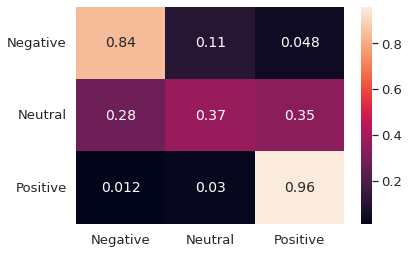

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, normalize='true')

df_cm = pd.DataFrame(cm, index=['Negative', 'Neutral', 'Positive'], columns=['Negative', 'Neutral', 'Positive'])

sns.set(font_scale=1.2) # for label size
ax = sns.heatmap(df_cm, annot=True, annot_kws={'size': 14}) # font size
ax.set_yticklabels(('Negative','Neutral','Positive'), rotation=360, va='center')
plt.show()

# Predictions

Make predictions on the test dataset using the transformer model trained with two epochs

In [ ]:
from simpletransformers.classification import ClassificationModel

model_args = {
   'use_multiprocessing': False,
   'fp16': False,
   'num_train_epochs': 1,
   'save_steps': -1, # prevent the model from saving intermediary checkpoints
   'silent': True
}

# Create a ClassificationModel with our trained model
model = ClassificationModel(
     "bert",
     '/content/drive/MyDrive/Springboard/Capstone Three/transformer/bert_uncased/outputs/',
     num_labels=3,
     args=model_args
 )

In [ ]:
import time

start_time = time.time()
y_pred, _ = model.predict(X_test)
print("--- Predict time %s seconds ---" % (time.time() - start_time))

--- Predict time 512.7249441146851 seconds ---


#Save the model

In [ ]:
import os
import tarfile
 
def pack_model(model_path='',file_name=''):
  files = [files for root, dirs, files in os.walk(model_path)][0]
  with tarfile.open(file_name+ '.tar.gz', 'w:gz') as f:
    for file in files:
      f.add(f'{model_path}/{file}')
 
# run the function
pack_model('/content/drive/MyDrive/Springboard/Capstone Three/transformer/bert_uncased/outputs/','model')

In [ ]:
from google.colab import files

files.download('model.tar.gz')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Hyperparameter Optimization

In [ ]:
!pip install wandb

In [ ]:
from sklearn.model_selection import train_test_split

eval_df, test_df_sub = train_test_split(test_df, test_size=0.5, random_state=42)

In [ ]:
import wandb

sweep_config = {
    "method": "bayes",  # grid, random
    "metric": {"name": "train_loss", "goal": "minimize"},
    "parameters": {
        "num_train_epochs": {"min": 1, "max": 40},
        "learning_rate": {"min": 0, "max": 4e-4},
    },
    "early_terminate": {"type": "hyperband", "min_iter": 6,},
}

sweep_id = wandb.sweep(sweep_config, project="ABSA - Hyperparameter Tuning")

Create sweep with ID: qvbg15yi
Sweep URL: https://wandb.ai/amythemirror/ABSA%20-%20Hyperparameter%20Tuning/sweeps/qvbg15yi


In [ ]:
model_args_hyperparameter_tuning = {
   'output_dir': '/content/drive/MyDrive/Springboard/Capstone Three/transformer_hyperparameter_tuning/outputs/',
   'cache_dir': '/content/drive/MyDrive/Springboard/Capstone Three/transformer_hyperparameter_tuning/cache_dir/',
   'use_multiprocessing': False,
   'fp16': False,
  #  'fp16_opt_level': 'O1',
  #  'max_seq_length': 128,
  #  'train_batch_size': 8,
   'eval_batch_size': 32,
  #  'gradient_accumulation_steps': 1,
  #  'num_train_epochs': 3,
  #  'weight_decay': 0,
  #  'learning_rate': 4e-5,
   'manual_seed': 4,
  #  'adam_epsilon': 1e-8,
  #  'warmup_ratio': 0.06,
  #  'warmup_steps': 0,
  #  'max_grad_norm': 1.0,

  #  'logging_steps': 50,
   'evaluate_during_training': True,
   'evaluate_during_training_verbose': True,
   'save_steps': -1,
  #  'eval_all_checkpoints': True,
  #  'use_tensorboard': True,

   'overwrite_output_dir': True,
   'reprocess_input_data': True,
   'wandb_project': "ABSA - Hyperparameter Tuning",
   'no_save': True
}

In [ ]:
from simpletransformers.classification import ClassificationModel

def train():
    # Initialize a new wandb run
    wandb.init()

    # Create a TransformerModel
    model = ClassificationModel(
        # "roberta",
        # "roberta-base",
        'bert',
        'bert-base-uncased',
        num_labels=3,
        args=model_args_hyperparameter_tuning,
        sweep_config=wandb.config,
    )

    # Train the model
    model.train_model(
        train_df,
        eval_df=eval_df
        )

    #Evaluate the model
    model.eval_model(eval_df)

    # Sync wandb
    wandb.join()

In [ ]:
wandb.agent(sweep_id, train)

wandb: Agent Starting Run: m8m2pkwn with config:
wandb: 	learning_rate: 0.00014617843025810427
wandb: 	num_train_epochs: 3
wandb: Currently logged in as: amythemirror (use `wandb login --relogin` to force relogin)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/85259 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Running Epoch 1 of 3:   0%|          | 0/85259 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/85259 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/2665 [00:00<?, ?it/s]

Training loss,0.62712
lr,0.0
global_step,255777
_runtime,53568
_timestamp,1615038167
_step,5247
mcc,0.0
train_loss,0.95456
eval_loss,0.86229


Training loss,▁▃▆▂▄▂█▃▅▃▅▅▅▃▇▁▄▆▁▆▄▆▅▇▃▅▄▅▃▄▇▄▇▆▆▇▇▆▆▇
lr,▂▅███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
mcc,██▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,▃▄▄▃▃▄▃▂▆▃▃▄▃▃▄█▄▃▁▂▁▄▄▃▂▂▂▃▁▃▆▂▄▁▂▄▄▄▅▄
eval_loss,▁▃▇▇▇▇▇▇█▇▇▇▇▇▇▇▇█▇▇▇▇▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇


wandb: Agent Starting Run: tlsdv88r with config:
wandb: 	learning_rate: 6.863087099608297e-05
wandb: 	num_train_epochs: 18


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch:   0%|          | 0/18 [00:00<?, ?it/s]

Running Epoch 0 of 18:   0%|          | 0/85259 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
